In [60]:
!pip install -q git+https://github.com/tensorflow/docs

In [61]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

2.2.0-rc2


In [62]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
url = 'https://raw.githubusercontent.com/hamdiibnizhar/bangkit-w05-winequality/master/datasets/winequality-red.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [64]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [66]:
df.shape

(1599, 12)

In [67]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
from collections import Counter

In [69]:
Counter(df['quality'])

Counter({3: 10, 4: 53, 5: 681, 6: 638, 7: 199, 8: 18})

In [0]:
# sns.pairplot(df)

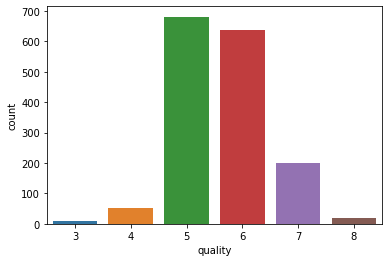

In [71]:
sns.countplot(x='quality', data=df)

In [0]:
qualityString = []
for i in df['quality'] :
  if 0 <= i < 5 :
    qualityString.append(0)
  elif 5 <= i < 7 :
    qualityString.append(1)
  else :
    qualityString.append(1)
df['Rating'] = qualityString

In [286]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Rating
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [0]:
# df['Rating'] = df['Rating'].map({0: 'Bad', 1: 'Good'})
# df = pd.get_dummies(df, prefix='', prefix_sep='')
# df.tail()

In [288]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Rating
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.960600
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.194605
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,1.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [289]:
dataset = df.copy()
dataset.pop("quality")

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [0]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [0]:
# sns.pairplot(dataset)

In [292]:
train_dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Rating
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,1
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,1
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,1
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,1
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
281,7.7,0.270,0.68,3.50,0.358,5.0,10.0,0.99720,3.25,1.08,9.9,1
932,7.6,0.400,0.29,1.90,0.078,29.0,66.0,0.99710,3.45,0.59,9.5,1
732,7.3,0.835,0.03,2.10,0.092,10.0,19.0,0.99660,3.39,0.47,9.6,1
715,7.2,0.490,0.18,2.70,0.069,13.0,34.0,0.99670,3.29,0.48,9.2,1


In [293]:
len(train_dataset.keys())

12

In [294]:
train_stats = train_dataset.describe()
train_stats.pop("Rating")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1279.0,8.310164,1.744190,4.60000,7.1000,7.90000,9.250000,15.9000
volatile acidity,1279.0,0.525571,0.176645,0.12000,0.3900,0.52000,0.635000,1.5800
citric acid,1279.0,0.271618,0.196822,0.00000,0.0900,0.26000,0.430000,0.7900
residual sugar,1279.0,2.516341,1.300985,0.90000,1.9000,2.20000,2.600000,13.9000
chlorides,1279.0,0.087347,0.045666,0.01200,0.0710,0.07900,0.091000,0.6110
free sulfur dioxide,1279.0,15.868647,10.438880,1.00000,7.0000,14.00000,21.000000,72.0000
total sulfur dioxide,1279.0,46.488663,32.952841,6.00000,22.0000,38.00000,62.000000,289.0000
density,1279.0,0.996739,0.001888,0.99007,0.9956,0.99676,0.997855,1.0032
pH,1279.0,3.312588,0.153923,2.87000,3.2100,3.31000,3.400000,4.0100
sulphates,1279.0,0.655012,0.160192,0.33000,0.5500,0.62000,0.730000,1.9800


In [0]:
train_labels = train_dataset.pop('Rating')
test_labels = test_dataset.pop('Rating')

In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [297]:
train_labels.shape

(1279,)

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Flatten(input_shape=[(len(train_dataset.keys()))]),
    # layers.Dense(64, activation='relu', input_shape=[(len(train_dataset.keys()))]),
    # layers.Dense(16, activation='relu'),
    layers.Dense(128, activation='relu'),
    # layers.Dense(64, activation='relu'),
    # layers.Dense(2, activation=tf.nn.sigmoid),
    # tf.keras.layers.Dropout(0.2),
    layers.Dense(3),
  ])

  optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

  model.compile(optimizer=optimizer,
              # loss='binary_crossentropy',
              # loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  return model

In [299]:
model = build_model()
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 11)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               1536      
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 387       
Total params: 1,923
Trainable params: 1,923
Non-trainable params: 0
_________________________________________________________________


In [0]:
# example_batch = normed_train_data[:10]
# example_result = model.predict(example_batch)
# example_result

In [301]:
EPOCHS = 1000

checkpoint_path = "/content/gdrive/My Drive/Trained_Models/wine_binary_quality/wine_binary_quality.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
history = model.fit(
  normed_train_data, train_labels,
  # train_dataset, train_labels,
  epochs=EPOCHS, 
  # validation_split = 0.2, 
  # verbose=0,
  # callbacks=[cp_callback])
  # callbacks=[tfdocs.modeling.EpochDots()])
  # batch_size=1
  )

Epoch 1/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.2811 - accuracy: 0.9234
Epoch 2/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.1552 - accuracy: 0.9586
Epoch 3/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.1446 - accuracy: 0.9601
Epoch 4/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.1362 - accuracy: 0.9578
Epoch 5/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.1307 - accuracy: 0.9586
Epoch 6/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.1319 - accuracy: 0.9593
Epoch 7/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.1211 - accuracy: 0.9617
Epoch 8/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.1143 - accuracy: 0.9601
Epoch 9/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.1190 - accuracy: 0.9586
Epoch 10/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1115 - accuracy: 0.9648

In [315]:
test_loss, test_acc = model.evaluate(normed_test_data, test_labels, verbose=2)
# test_loss, test_acc = model.evaluate(test_dataset, test_labels, verbose=2)
print('Test accuracy:', test_acc)

10/10 - 0s - loss: 2.5925 - accuracy: 0.9344
Test accuracy: 0.934374988079071


In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [317]:
predictions = probability_model.predict(
    # test_dataset)
    normed_test_data)
predictions

array([[2.48942453e-24, 1.00000000e+00, 1.18498123e-16],
       [4.15012734e-20, 1.00000000e+00, 4.14122065e-14],
       [0.00000000e+00, 1.00000000e+00, 1.66556778e-23],
       [4.64955542e-27, 1.00000000e+00, 4.08379523e-18],
       [2.63512438e-13, 1.00000000e+00, 1.46413600e-12],
       [7.44502225e-30, 1.00000000e+00, 3.66966478e-19],
       [2.61282020e-38, 1.00000000e+00, 6.08700725e-22],
       [9.33429419e-07, 9.99998927e-01, 6.17168396e-08],
       [1.04638893e-08, 1.00000000e+00, 4.48064554e-08],
       [3.98154787e-10, 1.00000000e+00, 8.93831710e-12],
       [3.21708843e-29, 1.00000000e+00, 1.89320367e-17],
       [4.20381693e-05, 9.99956489e-01, 1.44449382e-06],
       [1.78878281e-07, 9.99999762e-01, 3.16013669e-08],
       [4.57573233e-16, 1.00000000e+00, 4.41298820e-12],
       [4.19591237e-11, 1.00000000e+00, 3.08751857e-10],
       [4.08712445e-21, 1.00000000e+00, 1.41105948e-16],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.11461945e-30, 1.00000

In [335]:
test_labels

11      1
23      1
24      1
25      1
28      1
       ..
1561    1
1572    1
1575    1
1584    1
1594    1
Name: Rating, Length: 320, dtype: int64

In [336]:
np.argmax(predictions[5])

1

In [320]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,epoch
995,1.306856e-09,1.0,995
996,2.328306e-09,1.0,996
997,1.955777e-09,1.0,997
998,2.048909e-09,1.0,998
999,2.238178e-09,1.0,999


In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

In [0]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [0]:
model.save_weights('/content/gdrive/My Drive/Trained_Models/wine_binary_classifier/wine_binary_quality_model')

In [0]:
model_save_name = 'wine_binary_classifier'
save_model_path = '/content/gdrive/My Drive/Trained_Models/wine_binary_classifier'

In [342]:
model.save(save_model_path)

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Trained_Models/wine_binary_classifier/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Trained_Models/wine_binary_classifier/assets


In [0]:
model.save('/content/gdrive/My Drive/Trained_Models/wine_binary_classifier/wine_binary_classifier.h5') 

In [344]:
converter = tf.lite.TFLiteConverter.from_saved_model(save_model_path)
tflite_model = converter.convert()
open("/content/gdrive/My Drive/Trained_Models/wine_binary_classifier/wine_binary_classifier.tflite", "wb").write(tflite_model)

8788